In [100]:
#importing the libaries needed for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
#importing data document
AusWeather=pd.read_csv('data/cleaned_data.csv')
AusWeatherGrouped=AusWeather.groupby(by='Location')
AusWeather=AusWeather.drop(columns=["Unnamed: 0"])

In [70]:
AusWeather.columns #looking into the data that has been divided into groups

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [71]:
AusWeatherLocations = AusWeather['Location'].unique() #looking at the unique information in relation to the 
print("There is " + str(AusWeatherLocations.shape[0]) +" locations.") 
AusWeatherLocations

There is 49 locations.


array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini',
       'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane',
       'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RA AF',
       'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

# Temp Max-Min for location

In [5]:
TempDF = pd.DataFrame(AusWeather,columns= ['MinTemp', 'MaxTemp'])#creates a temperary data frame that leaves the original location

In [6]:
TempDF['CheckVar']=TempDF['MaxTemp']-TempDF['MinTemp']#creates a new variable catagory for the dataframe

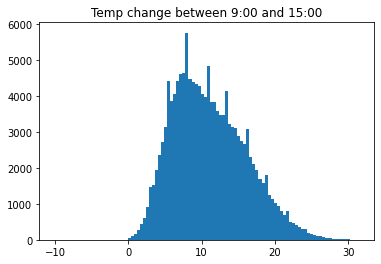

In [7]:

x = range(TempDF['CheckVar'].count())
fig, Main = plt.subplots()
Main.hist(TempDF['CheckVar'],bins=100)
Main.set_title('Temp change between 9:00 and 15:00') 
plt.show()#creates a graph that shows the frequency of the temperature change that is most common
#we can learn that it's most common for it to gain 10 degrees during the day with no days having been colder in the afternoon than in the morning

# When humidity rises, rain is due tomorrow

In [8]:
TempDF = pd.DataFrame(AusWeather,columns=['Humidity9am','Humidity3pm','RainTomorrow'])#creates a temperary data frame that leaves the original location

In [9]:
TempDF['CheckVar']=TempDF['Humidity3pm']-TempDF['Humidity9am']

In [10]:
valTr=0
valFa=0

for i in range(TempDF['CheckVar'].count()):
    if TempDF['CheckVar'][i]>=0:
        if TempDF['RainTomorrow'][i] == "Yes":
            valTr+=1
        else:
            valFa+=1

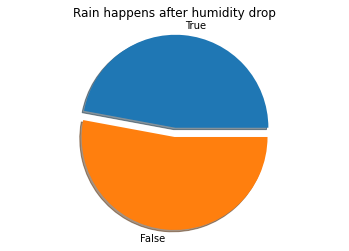

In [11]:
fig1, Main = plt.subplots()
Main.pie([valTr/TempDF['CheckVar'].count()*100,valFa/TempDF['CheckVar'].count()*100], labels=['True','False'],shadow=True,explode=(0,0.1))
Main.set_title('Rain happens after humidity drop')
Main.axis('equal')
plt.show()

# from this information we can clearly tell that there is a tend that means humidity is an indicator of rain fall as we earlier predicted

# When preasure rises, rain is due tomorrow

In [12]:
TempDF = pd.DataFrame(AusWeather,columns=['Location','Pressure9am', 'Pressure3pm','RainTomorrow'])#creates a temperary data frame that leaves the original location

In [13]:
TempDF['CheckVar']=TempDF['Pressure3pm']-TempDF['Pressure9am']

In [14]:
valTr=0
valFa=0

for i in range(TempDF['CheckVar'].count()):
    if TempDF['CheckVar'][i]>0:
        if TempDF['RainTomorrow'][i] == "Yes":
            valTr+=1
        else:
            valFa+=1

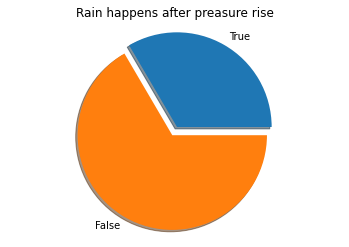

In [15]:
fig1, Main = plt.subplots()
Main.pie([valTr/TempDF['CheckVar'].count()*100,valFa/TempDF['CheckVar'].count()*100], labels=['True','False'],shadow=True,explode=(0,0.1))
Main.set_title('Rain happens after preasure rise')
Main.axis('equal')
plt.show()

#once again, by noticing a trend we can see that while it's not as strong as the corrilation between humidity rising and rain happening

# When preasure rises and humidity rises, rain is due tomorrow

In [16]:
TempDF = pd.DataFrame(AusWeather,columns=['Location','Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm','RainTomorrow'])#creates a temperary data frame that leaves the original locationv

In [17]:
TempDF['CheckVar1']=TempDF['Pressure3pm']-TempDF['Pressure9am']
TempDF['CheckVar2']=TempDF['Humidity3pm']-TempDF['Humidity9am']

In [18]:
valTr=0
valFa=0

for i in range(TempDF['CheckVar1'].count()):
    if TempDF['CheckVar1'][i]>0 and TempDF['CheckVar2'][i]>0:
        if TempDF['RainTomorrow'][i] == "Yes":
            valTr+=1
        else:
            valFa+=1

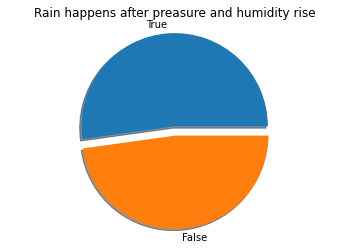

In [19]:
fig1, Main = plt.subplots()
Main.pie([valTr/TempDF['CheckVar1'].count()*100,valFa/TempDF['CheckVar1'].count()*100], labels=['True','False'],shadow=True,explode=(0,0.1))
Main.set_title('Rain happens after preasure and humidity rise')
Main.axis('equal')
plt.show()

#finally we can see that the trend we originally observed when looking that the data that the element changing and how they relate to the information
#in combining the previouse 2 tests, we can see that we can now predict when rain will happen, majority of the time

# temp paterns for each location, yearly compared

In [20]:
#setting the location for where the information is to be taken from
location='Sale'
measure='MaxTemp'
TempDFOne = pd.DataFrame(AusWeather,columns=['Location','Date',measure])#creates a temperary data frame that leaves the original location
TempDFOne= TempDFOne.where(TempDFOne['Location']==location)
TempDFOne.dropna()
print(TempDFOne.count())

Location    3000
Date        3000
MaxTemp     3000
dtype: int64


In [21]:

#declairing the years that will be used for the data

dateOne="2008-0-1"
dateTwo="2009-0-1"
dateThree="2010-0-1"
dateFour="2011-0-1"
dateFive="2012-0-1"
dateSix="2013-0-1"
dateSeven="2014-0-1"
dateEight="2015-0-1"
dateNine="2016-0-1"
dateTen="2017-0-1"
dateEleven="2018-0-1"

lables=["2009","2010","2011","2012","2013","2014","2015","2016","2017"]

#creating data frames that are for a specific years 

temp= TempDFOne.where(TempDFOne['Date']>=dateTwo)
temp= TempDFOne.where(temp['Date']<dateThree)
temp=temp.dropna()

temp2= TempDFOne.where(TempDFOne['Date']>=dateThree)
temp2= TempDFOne.where(temp2['Date']<dateFour)
temp2=temp2.dropna()

temp3= TempDFOne.where(TempDFOne['Date']>=dateFour)
temp3= TempDFOne.where(temp3['Date']<dateFive)
temp3=temp3.dropna()

temp4= TempDFOne.where(TempDFOne['Date']>=dateFive)
temp4= TempDFOne.where(temp4['Date']<dateSix)
temp4=temp4.dropna()

temp5= TempDFOne.where(TempDFOne['Date']>=dateSix)
temp5= TempDFOne.where(temp5['Date']<dateSeven)
temp5=temp5.dropna()

temp6= TempDFOne.where(TempDFOne['Date']>=dateSeven)
temp6= TempDFOne.where(temp6['Date']<dateEight)
temp6=temp6.dropna()

temp7= TempDFOne.where(TempDFOne['Date']>=dateEight)
temp7= TempDFOne.where(temp7['Date']<dateNine)
temp7=temp7.dropna()

temp8= TempDFOne.where(TempDFOne['Date']>=dateNine)
temp8= TempDFOne.where(temp8['Date']<dateTen)
temp8=temp8.dropna()

temp9= TempDFOne.where(TempDFOne['Date']>=dateTen)
temp9= TempDFOne.where(temp9['Date']<dateEleven)
temp9=temp9.dropna()



ran=range(temp['Date'].count())
ran2=range(temp2['Date'].count())
ran3=range(temp3['Date'].count())
ran4=range(temp4['Date'].count())
ran5=range(temp5['Date'].count())
ran6=range(temp6['Date'].count())
ran7=range(temp7['Date'].count())
ran8=range(temp8['Date'].count())
ran9=range(temp9['Date'].count())

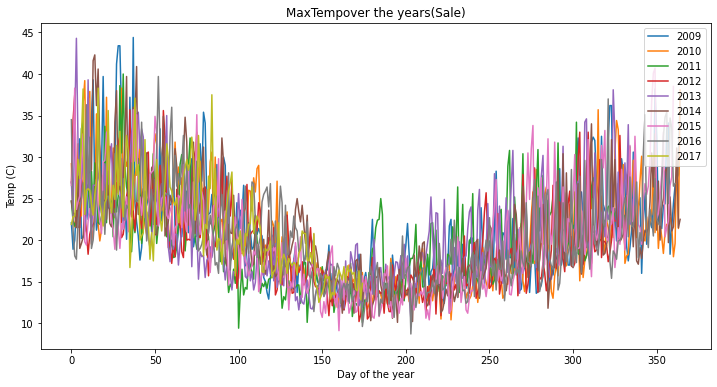

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(ran,temp[measure],
        ran2,temp2[measure],
        ran3,temp3[measure],
        ran4,temp4[measure],
        ran5,temp5[measure],
        ran6,temp6[measure],
        ran7,temp7[measure],
        ran8,temp8[measure],
        ran9,temp9[measure])
ax.set_xlabel("Day of the year")
ax.set_ylabel("Temp (C)")
ax.set_title(measure+"over the years("+location+")") #allows the title to change when the location does
ax.legend(lables,loc=1)

plt.show()
#this shows how the temp-max isn't only higher during the summer months of the year for most locations, it also shows how its less "Stable" during the start and end of the year with much greater varience in the information present

# Pressue and humidity changes

In [23]:
TempDF = pd.DataFrame(AusWeather,columns=['Location','Pressure9am', 'Pressure3pm','Humidity9am','Humidity3pm'])

In [24]:
TempDF['PressureChange']=TempDF['Pressure3pm']-TempDF['Pressure9am']
TempDF['HumidityChange']=TempDF['Humidity3pm']-TempDF['Humidity9am']

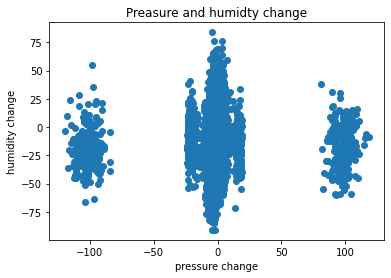

In [25]:
fig1, Main = plt.subplots()
Main.scatter(x=TempDF['PressureChange'],y=TempDF['HumidityChange'])
Main.set_title('Preasure and humidty change')
Main.set_xlabel("pressure change")
Main.set_ylabel("humidity change")
plt.show()

#this was more of a experiment on testing to see if the change in humidity had any relation to the change in pressure during the day
#what we obsevere is that while there is clearly a trend, it's not linear and can't have the location prediced based on either value

# Heat map

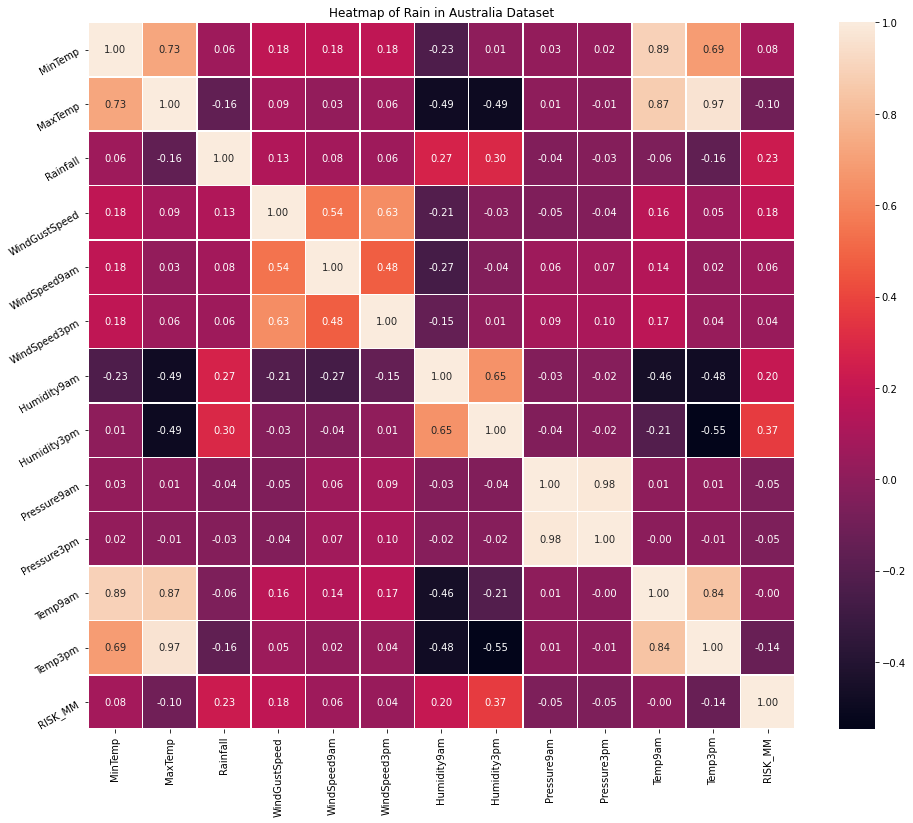

In [72]:
# The Heat Map for the entire dataset
correlation = AusWeather.corr()
plt.figure(figsize=(16,13))
plt.title('Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [101]:
TempDF = pd.DataFrame(AusWeather,columns=['Location','Date', 'RainToday'])
location= "Ballarat"

TempDFOne = TempDF.loc[TempDF['Location'] == location]

# Replace Yes and No with 1 and 0 respectively
TempDFOne['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [102]:
TempDFOne

,Location,Date,RainToday
53674,Ballarat,2008-12-01,1
53675,Ballarat,2008-12-02,0
53676,Ballarat,2008-12-03,0
53677,Ballarat,2008-12-04,0
53678,Ballarat,2008-12-05,1
...,...,...,...
56697,Ballarat,2017-06-21,0
56698,Ballarat,2017-06-22,0
56699,Ballarat,2017-06-23,0
56700,Ballarat,2017-06-24,1


In [103]:
# Convert Date with type string to datetime format
TempDFOne['Date'] = pd.to_datetime(TempDFOne['Date'])

# Add Year Column
TempDFOne['Year'] = TempDFOne['Date'].dt.year

# Add Year Column
TempDFOne['Month'] = TempDFOne['Date'].dt.month

# Add Year Column
TempDFOne['Day'] = TempDFOne['Date'].dt.day

# Drop Date Column
TempDFOne.drop(columns=['Date'], axis=1, inplace=True)

In [104]:
TempDFOne

,Location,RainToday,Year,Month,Day
53674,Ballarat,1,2008,12,1
53675,Ballarat,0,2008,12,2
53676,Ballarat,0,2008,12,3
53677,Ballarat,0,2008,12,4
53678,Ballarat,1,2008,12,5
...,...,...,...,...,...
56697,Ballarat,0,2017,6,21
56698,Ballarat,0,2017,6,22
56699,Ballarat,0,2017,6,23
56700,Ballarat,1,2017,6,24


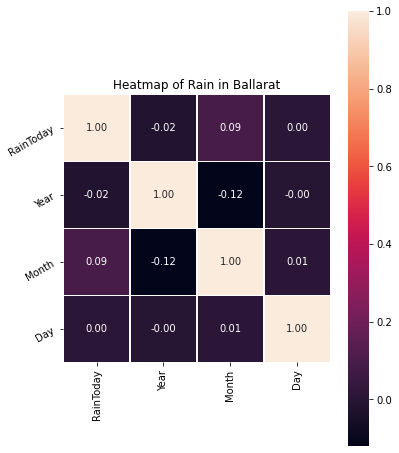

In [106]:
# Heat map for only Ballarat
correlation = TempDFOne.corr()
plt.figure(figsize=(6,8))
plt.title('Heatmap of Rain in Ballarat')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()